# Iris KNN

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%matplotlib inline
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import random as rnd
import csv
import random
import math
import operator

iris = datasets.load_iris()

df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
def loadDataset(filename, split, trainingSet=[] , testSet=[]):
	with open(filename, 'r') as csvfile:
	    lines = csv.reader(csvfile)
	    dataset = list(lines)
	    for x in range(len(dataset)-1):
	        for y in range(4):
	            dataset[x][y] = float(dataset[x][y])
	        if random.random() < split:
	            trainingSet.append(dataset[x])
	        else:
	            testSet.append(dataset[x])


In [8]:
# prepare data
trainingSet=[]
testSet=[]
split = 0.67
loadDataset('iris.csv', split, trainingSet, testSet)
print('Train set: ', repr(len(trainingSet)))
print('Test set: ' , repr(len(testSet)))

Train set:  104
Test set:  45


In [9]:
def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors

In [12]:
def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0


In [17]:
# generate predictions
predictions=[]
k = 3
for x in range(len(testSet)):
	neighbors = getNeighbors(trainingSet, testSet[x], k)
	result = getResponse(neighbors)
	predictions.append(result)
	print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
accuracy = getAccuracy(testSet, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

> predicted='setosa', actual='setosa'
> predicted='setosa', actual='setosa'
> predicted='setosa', actual='setosa'
> predicted='setosa', actual='setosa'
> predicted='setosa', actual='setosa'
> predicted='setosa', actual='setosa'
> predicted='setosa', actual='setosa'
> predicted='setosa', actual='setosa'
> predicted='setosa', actual='setosa'
> predicted='setosa', actual='setosa'
> predicted='setosa', actual='setosa'
> predicted='setosa', actual='setosa'
> predicted='setosa', actual='setosa'
> predicted='setosa', actual='setosa'
> predicted='setosa', actual='setosa'
> predicted='versicolor', actual='versicolor'
> predicted='versicolor', actual='versicolor'
> predicted='versicolor', actual='versicolor'
> predicted='versicolor', actual='versicolor'
> predicted='versicolor', actual='versicolor'
> predicted='versicolor', actual='versicolor'
> predicted='versicolor', actual='versicolor'
> predicted='versicolor', actual='versicolor'
> predicted='virginica', actual='versicolor'
> predicted='vers

# Using sklearn

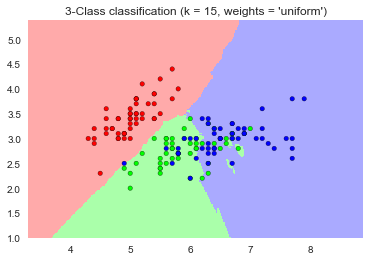

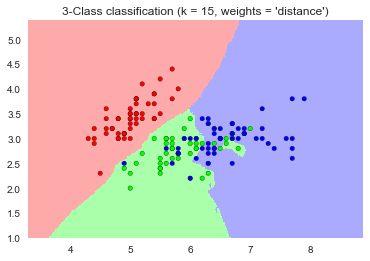

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

# Digits classification

In [30]:
from IPython.display import Image
Image(url= "pic1.PNG")

In [3]:
from sklearn import datasets, neighbors

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
X_digits.shape
y_digits.shape

from collections import Counter
Counter(y_digits).keys() # equals to list(set(words))
Counter(y_digits).values() # counts the elements' frequency

n_samples = len(X_digits)

X_train = X_digits[:int(.9 * n_samples)]
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]

knn = neighbors.KNeighborsClassifier()
print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))

(1797, 64)

(1797,)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[178, 182, 177, 183, 181, 182, 181, 179, 174, 180]

KNN score: 0.961111
